In [1]:
%run path.py
from dzdy import *
import matplotlib.pyplot as plt

In [2]:
da = DirectorABM()
da.load_pcore('pSIR', 'scripts/pSIR.txt')
da.load_pcore('pSIR_net', 'scripts/pSIR_net.txt')
da.load_dcore('scripts/SIR_bn.txt')

PCore pSIR added
PCore pSIR_net added
Dcore SIR_bn added


In [3]:
cfd = da.new_abm('ABM_SIR', 'pSIR', 'SIR_bn')
cfd.add_behaviour('cycle', be_type='Reincarnation', s_birth = 'Sus', s_death = 'Dead')
cfd.add_behaviour('transmission', be_type='ComFDShock', s_src = 'Inf', t_tar = 'Infect')
cfd.set_observations(states=['Sus', 'Inf', 'Rec'], 
                      behaviours=['transmission'])

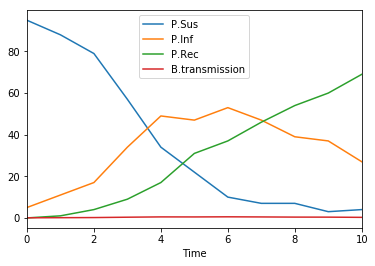

In [4]:
a1 = da.generate_abm('ABM_SIR')
out = simulate(a1, {'Sus': 95, 'Inf': 5}, 0, 10)
out.plot()
plt.show()

In [5]:
cfdf = da.new_abm('ABM_SIR_Fast', 'pSIR', 'SIR_bn')
cfdf.add_behaviour('cycle', be_type='Reincarnation', s_birth = 'Sus', s_death = 'Dead')
cfdf.add_behaviour('transmission', be_type='ComFDShockFast', s_src = 'Inf', t_tar = 'Infect', dt=0.5)
cfdf.set_observations(states=['Sus', 'Inf', 'Rec'], 
                      behaviours=['transmission'])

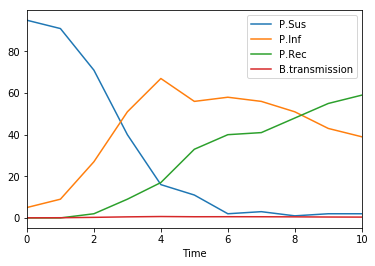

In [6]:
a2 = da.generate_abm('ABM_SIR_Fast')
out = simulate(a2, {'Sus': 95, 'Inf': 5}, 0, 10)
out.plot()
plt.show()

In [7]:
cfdf = da.new_abm('ABM_SIR_DD', 'pSIR_net', 'SIR_bn')
cfdf.add_behaviour('cycle', be_type='Reincarnation', s_birth = 'Sus', s_death = 'Dead')
cfdf.add_behaviour('transmission', be_type='ComDDShock', s_src = 'Inf', t_tar = 'Infect')
cfdf.set_observations(states=['Sus', 'Inf', 'Rec'], 
                      behaviours=['transmission'])

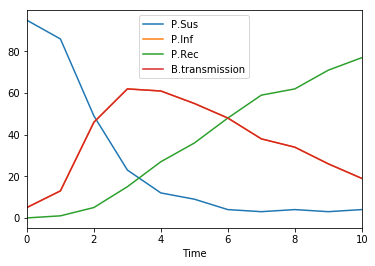

In [8]:
a3 = da.generate_abm('ABM_SIR_DD')
out = simulate(a3, {'Sus': 95, 'Inf': 5}, 0, 10)
out.plot()
plt.show()